In [2]:
from utils import build_dataset,get_unique_tags,distribution_tags,plot_tag_distribution,co_occurrence_matrix,correlation_tags_difficulty,clean_text
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data importations and checking for NaNs

In [3]:
folder_path = '../data/code_classification_dataset'
df = build_dataset(folder_path)
df

,prob_desc_time_limit,prob_desc_sample_outputs,src_uid,prob_desc_notes,prob_desc_description,prob_desc_output_spec,prob_desc_input_spec,prob_desc_output_to,prob_desc_input_from,lang,...,file_name,code_uid,prob_desc_memory_limit,prob_desc_sample_inputs,exec_outcome,source_code,prob_desc_created_at,tags,hidden_unit_tests,id
0,3 seconds,"[""4\n10\n4\n0""]",afcd41492158e68095b01ff1e88c3dd4,"NoteIn the first test case of the example, the...","There are $$$n$$$ positive integers $$$a_1, a_...",For $$$t$$$ test cases print the answers in th...,The first line of the input contains one integ...,standard output,standard input,Python 3,...,train_000.jsonl,df0e2ae03513f2b9280e19a1df6c8d84,256 megabytes,"[""4\n6\n40 6 40 3 20 1\n1\n1024\n4\n2 4 8 16\n...",PASSED,a = int(input())\nfor i in range(a):\n f = ...,1576321500,"[number theory, greedy]",,1
1,2 seconds,"[""5"", ""16"", ""18""]",e52ec2fa5bcf5d2027d57b0694b4e15a,NoteIn the first example it is possible to con...,You are given an undirected graph consisting o...,Print one integer — the minimum number of coin...,The first line contains two integers $$$n$$$ a...,standard output,standard input,Python 3,...,train_000.jsonl,d045b0ecd6aaad78a2574780f55d22a1,256 megabytes,"[""3 2\n1 3 3\n2 3 5\n2 1 1"", ""4 0\n1 3 3 7"", ""...",PASSED,def read_nums():\n return [int(x) for x in ...,1545921300,"[dsu, greedy, graphs]",,10
2,1 second,"[""2\n5000 9\n1\n7 \n4\n800 70 6 9000 \n1\n1000...",cd2519f4a7888b2c292f05c64a9db13a,None,A positive (strictly greater than zero) intege...,Print $$$t$$$ answers to the test cases. Each ...,The first line contains an integer $$$t$$$ ($$...,standard output,standard input,PyPy 3,...,train_000.jsonl,52a2313fac7f87cb6696ab7b8e4dc447,256 megabytes,"[""5\n5009\n7\n9876\n10000\n10""]",PASSED,t = int(input())\nfor i in range(t):\n canP...,1590154500,"[implementation, math]",,100
3,1 second,"[""9"", ""14""]",d7fe15a027750c004e4f50175e1e20d2,None,"Polycarp is working on a new project called ""P...",Print a single number — answer to the problem.,Input file will contain not more than 100 comm...,standard output,standard input,Python 2,...,train_005.jsonl,68e7ea5367d538b53e8e36e804665b20,64 megabytes,"[""+Mike\nMike:hello\n+Kate\n+Dmitry\n-Dmitry\n...",PASSED,import sys\nz=x=0\nfor s in sys.stdin:\n\tif s...,1269100800,[implementation],,1000
4,1 second,"[""1"", ""0""]",a34f2aa89fe0e78b495b20400d73acf1,NoteThe first test case corresponds to the tre...,You are given a tree with $$$n$$$ vertices. Yo...,Print a single integer — the minimum number o...,The first line contains an integer $$$n$$$ ($$...,standard output,standard input,PyPy 3,...,train_005.jsonl,62ef7edca328924e63757b39c5d42156,256 megabytes,"[""6\n4 5\n2 6\n3 2\n1 2\n2 4"", ""4\n2 4\n4 1\n3...",PASSED,import sys\nfrom collections import defaultdic...,1593873900,"[graphs, constructive algorithms, graph matchi...",,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,2 seconds,"[""2\n1\n4\n5""]",56da4ec7cd849c4330d188d8c9bd6094,NoteIn the first test case to have an opportun...,The only difference between easy and hard vers...,Print $$$t$$$ integers — the answers to the te...,The first line contains an integer $$$t$$$ ($$...,standard output,standard input,Python 3,...,train_005.jsonl,33a78aa0bb3ecfef1ae0afd569e7bbe9,256 megabytes,"[""4\n5 2 2\n1 2 1 2 1\n9 3 3\n3 3 3 2 2 2 1 1 ...",PASSED,import sys\nfrom collections import deque\n\ni...,1572087900,"[two pointers, implementation]",,995
4977,2 seconds,"[""4"", ""0""]",259b4b538743608227bb6d22453b0833,NoteIn the first example preprocess moves are ...,You are given two strings $$$a$$$ and $$$b$$$ ...,Print a single integer — the minimum number of...,The first line of the input contains one integ...,standard output,standard input,Python 3,...,train_005.jsonl,1cfb984fa4a31c368aecae8fe7b7cb70,256 megabytes,"[""7\nabacaba\nbacabaa"", ""5\nzcabd\ndbacz""]",PASSED,n = int(input())\ns = input()\nt = input()\nc ...,1531751700,[implementatio

In [3]:
## Chekking for NaNs
print("Checking for NaNs:")
print(df.isna().sum())

Checking for NaNs:
prob_desc_time_limit           0
prob_desc_sample_outputs       0
src_uid                        0
prob_desc_notes             1349
prob_desc_description          0
prob_desc_output_spec         85
prob_desc_input_spec          33
prob_desc_output_to            1
prob_desc_input_from           1
lang                           0
lang_cluster                   0
difficulty                    39
file_name                      0
code_uid                       0
prob_desc_memory_limit         0
prob_desc_sample_inputs        0
exec_outcome                   0
source_code                    0
prob_desc_created_at           0
tags                           0
hidden_unit_tests              0
id                             0
dtype: int64


Too muchs nans in the prob_desc_notes column which will be droped, and maybe prob_desc_output_spec and prob_desc_input_spec that maybe is going to be used for our model maybe fill it with "" and concatenate the 3 columns prob_desc_descriptio and prob_desc_output_spec and prob_desc_input_spec

### Data vizualisation 

Unique tags: ['brute force', 'ternary search', 'games', 'string suffix structures', 'fft', 'trees', 'geometry', 'constructive algorithms', 'divide and conquer', 'graph matchings', 'bitmasks', 'hashing', 'chinese remainder theorem', 'greedy', 'meet-in-the-middle', 'dp', 'schedules', 'matrices', 'number theory', 'expression parsing', 'implementation', 'dsu', 'combinatorics', 'probabilities', 'binary search', 'math', 'interactive', 'data structures', 'shortest paths', 'sortings', 'strings', '2-sat', 'graphs', 'dfs and similar', 'flows', '*special', 'two pointers']


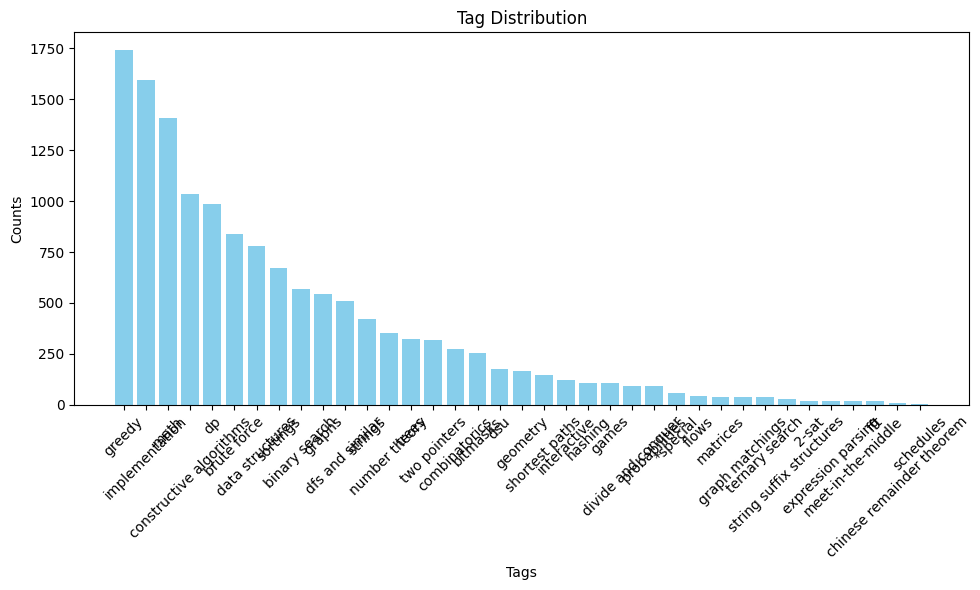

In [4]:
tags = get_unique_tags(df)
print(f"Unique tags: {tags}")
plot_tag_distribution(distribution_tags(df))


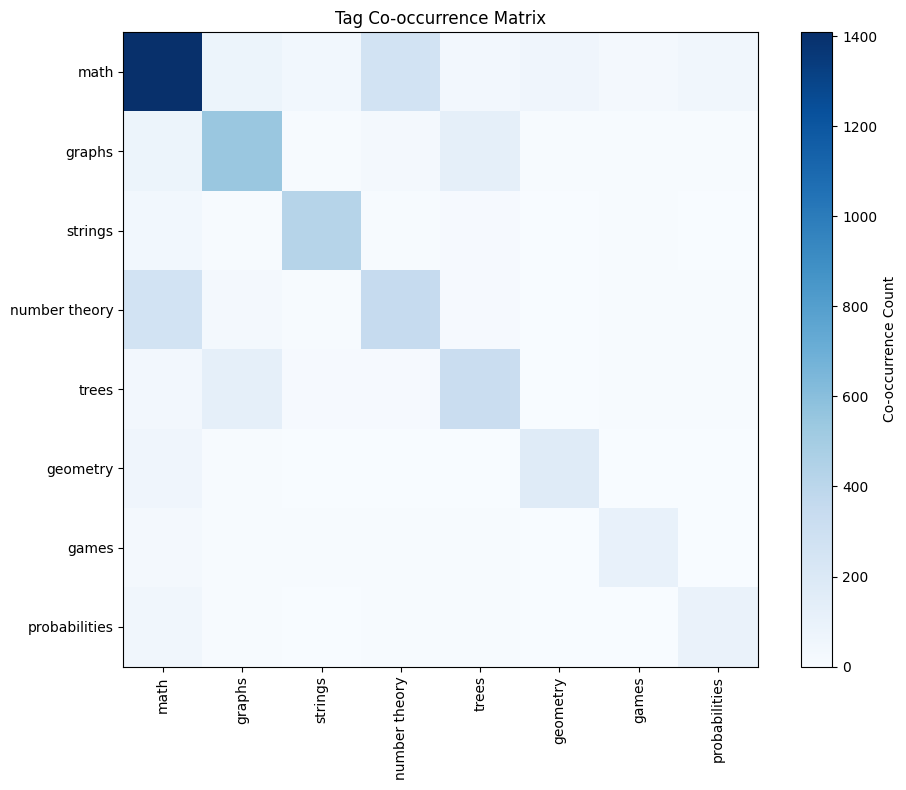

In [5]:
valid_tags = ['math', 'graphs', 'strings', 'number theory', 'trees', 'geometry', 'games', 'probabilities']
co_occurrence_matrix(df, valid_tags=valid_tags)

We notice that difficulty is the only numerical feature in our dataset, we will try to see if it's correlated to our tags.  We can see that our tags are for some correlated with the difficulty and can be used for the baseline model for example.

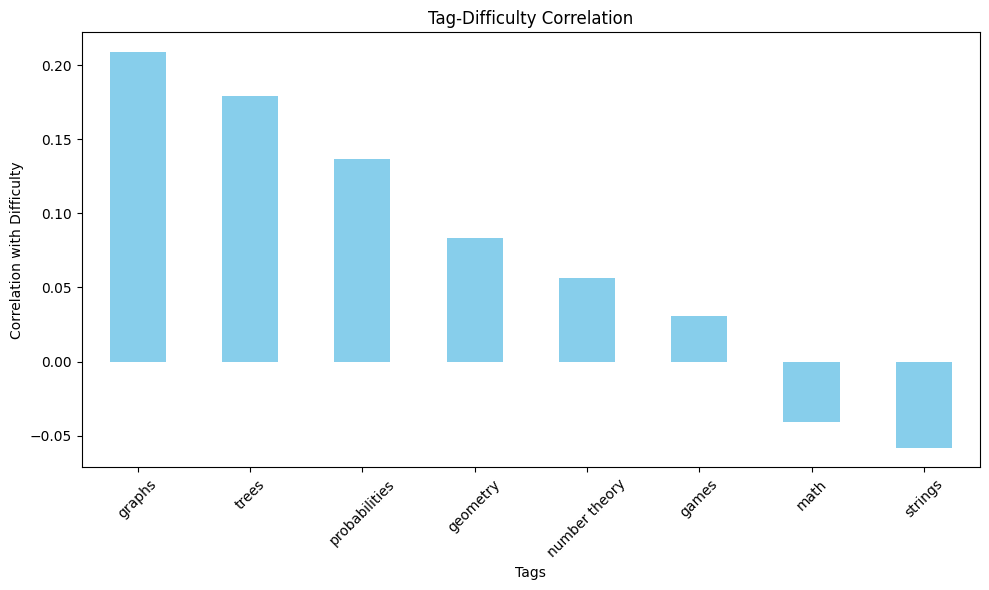

math            -0.040741
graphs           0.208906
strings         -0.058183
number theory    0.056708
trees            0.179510
geometry         0.083645
games            0.030849
probabilities    0.136867
dtype: float64

In [6]:
correlation_tags_difficulty(df, valid_tags=valid_tags)

## Checking for clean text :

In [5]:
##
test_text = df['prob_desc_description'].dropna().iloc[0]
print("Original text:", test_text)
cleaned_text = clean_text(test_text)
print("Cleaned text:", cleaned_text)

Original text: There are $$$n$$$ positive integers $$$a_1, a_2, \dots, a_n$$$. For the one move you can choose any even value $$$c$$$ and divide by two all elements that equal $$$c$$$.For example, if $$$a=[6,8,12,6,3,12]$$$ and you choose $$$c=6$$$, and $$$a$$$ is transformed into $$$a=[3,8,12,3,3,12]$$$ after the move.You need to find the minimal number of moves for transforming $$$a$$$ to an array of only odd integers (each element shouldn't be divisible by $$$2$$$).
Cleaned text: positive integers one move choose even value divide two elements equal example choose transformed move need find minimal number moves transforming array odd integers element divisible
